In [80]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline

In [81]:
dictDf = pd.read_excel('Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2013.xls'
                       ,sheetname = [2,3,4,5,6,7], header = 0)


In [82]:
dictDf[3].head(3)

,Généralistes et COMPETENCE MEP,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
0,01- Médecine générale,01- Ain,390,54611476,583275,297951,55492702,76286,7
1,01- Médecine générale,02- Aisne,366,63385345,385176,368001,64138522,67037,5
2,01- Médecine générale,03- Allier,257,35083665,67697,325877,35477239,17797,3


In [83]:
for key, value in dictDf.iteritems():
    name = (value.columns.values)[0]
    value.rename(columns={name: 'PROFESSION'}, inplace=True)

In [84]:
df = pd.concat(dictDf)
df.head(3)

PROFESSION DEPARTEMENT  EFFECTIFS  \
2 0  02- Anesthésie-réanimation chirurgicale     01- Ain         17   
  1  02- Anesthésie-réanimation chirurgicale   02- Aisne         22   
  2  02- Anesthésie-réanimation chirurgicale  03- Allier         19   

    HONORAIRES SANS DEPASSEMENT (euros) DEPASSEMENTS (euros)  \
2 0                             4329488              1879396   
  1                             4615160               191421   
  2                             4872085               416466   

    FRAIS DE DEPLACEMENTS (euros) HONORAIRES TOTAUX (euros)  \
2 0                             0                   6208884   
  1                           119                   4806700   
  2                             0                   5288551   

    NOMBRE DE DEPASSEMENTS DEPASSEMENT MOYEN (euros)  
2 0                  27995                        67  
  1                   8150                        23  
  2                   9479                        43

In [85]:
df.reset_index(drop=[0,1], inplace = True)
df.head(5)

,PROFESSION,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4329488,1879396,0,6208884,27995,67
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4615160,191421,119,4806700,8150,23
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,4872085,416466,0,5288551,9479,43
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,nc,nc,nc,nc,nc,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,nc,nc,nc,nc,nc,nc


In [86]:
df.size

161298

In [87]:
subDf = df.loc[:, ['PROFESSION', 'DEPARTEMENT', 'NOMBRE DE DEPASSEMENTS']]
subDf.replace(to_replace = r'- ', value = r'\s- ', inplace = True)
print subDf.shape
subDf.head(5)

(17922, 3)


,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,nc


In [88]:
subDf.replace(to_replace = 'nc', value = np.nan, inplace = True)
subDf.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,NaN
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,NaN


In [89]:
subDf.dropna(how='any', inplace=True)
subDf.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110114
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,12231


In [90]:
subDffilter = subDf[subDf['DEPARTEMENT'].str.contains(r'^TOTAL.*$')== False]
subDffilter2 = subDffilter[subDffilter['PROFESSION'].str.contains(r'^TOTAL.*$')== False]
subDffilter3 = subDffilter2[subDffilter2['NOMBRE DE DEPASSEMENTS'] != 0]

In [91]:
subDffilter3.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110114
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,12231


In [92]:
subDF = subDffilter3.groupby(['DEPARTEMENT', 'PROFESSION'])['NOMBRE DE DEPASSEMENTS'].mean()
frame = pd.DataFrame(subDF)
frame = frame.sort('NOMBRE DE DEPASSEMENTS', axis=0, ascending=False)
frame.head(5)

NOMBRE DE DEPASSEMENTS
DEPARTEMENT        PROFESSION                                                         
75- Paris (Ville)  26- Masseurs-kinésithérapeutes-rééducateurs                 3429673
                   01- OMNIPRATICIENS                                          2727344
                   01- Médecine générale                                       1880437
92- Hauts-de-Seine 26- Masseurs-kinésithérapeutes-rééducateurs                 1625487
                   01- OMNIPRATICIENS                                          1518491

In [93]:
subDF = subDffilter3.groupby(['DEPARTEMENT'])['NOMBRE DE DEPASSEMENTS'].mean()
frame1 = pd.DataFrame(subDF)
frame1 = frame1.sort('NOMBRE DE DEPASSEMENTS', axis=0, ascending=False)
frame1.head(5)

,NOMBRE DE DEPASSEMENTS
DEPARTEMENT,
75- Paris (Ville),396389.363636
92- Hauts-de-Seine,201734.872340
78- Yvelines,176894.526316
69- Rhône,153214.065217
77- Seine-et-Marne,141181.914286


In [94]:
subDF = subDffilter3.groupby(['PROFESSION'])['NOMBRE DE DEPASSEMENTS'].mean()
frame2 = pd.DataFrame(subDF)
frame2 = frame2.sort('NOMBRE DE DEPASSEMENTS', axis=0, ascending=False)
frame2.head(5)

,NOMBRE DE DEPASSEMENTS
PROFESSION,
01- OMNIPRATICIENS,214487.801980
15- Ophtalmologie,192657.404762
38- Médecins biologistes,154563.090000
19- Chirurgiens-dentistes,154563.090000
01- Médecine générale,139979.475248


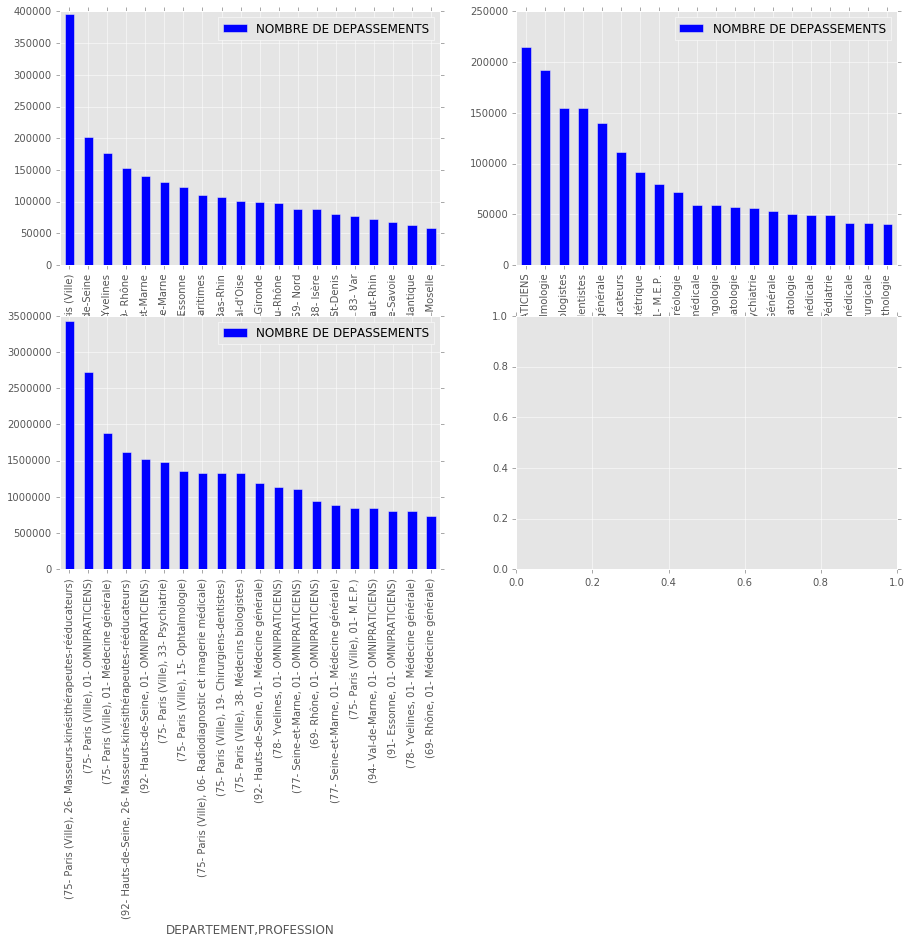

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2)
frame1.head(20).plot(ax=axes[0][0], kind='bar', figsize=(15,10))
frame2.head(20).plot(ax=axes[0][1], kind='bar', figsize=(15,10))
frame.head(20).plot(ax=axes[1][0], kind='bar', figsize=(15,10))

<p>
We notice that the number of overtaking is stronger for <b>OMNIPRATCIEN</b> and it is mostly for Paris.
</p>

In [96]:
densDf = pd.read_excel('densitePop.xls', skiprows=6, header=0)
densDf.columns = ['CODEGEO', 'DEPARTEMENT', 'DENSITE DE POPULATION']
densDf.head(5)

,CODEGEO,DEPARTEMENT,DENSITE DE POPULATION
0,1,01 - Ain,106.24
1,2,02 - Aisne,73.40
2,3,03 - Allier,46.72
3,4,04 - Alpes-de-Haute-Provence,23.28
4,5,05 - Hautes-Alpes,25.15


In [97]:
subDensDf = densDf.loc[:, ['DEPARTEMENT', 'DENSITE DE POPULATION']]
subDensDf.shape

(104, 2)

In [98]:
dropDensDf = subDensDf.dropna(how='any')
dropDensDf.shape

(100, 2)

In [99]:
dropDensDf['DEPARTEMENT'] = dropDensDf['DEPARTEMENT'].str.replace('75- Ville de Paris', '75- Paris (Ville)')

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [100]:
dropDensDf['DEPARTEMENT'] = dropDensDf['DEPARTEMENT'].str.replace(' - ', '- ')
dropDensDf.head(5)

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,DEPARTEMENT,DENSITE DE POPULATION
0,01- Ain,106.24
1,02- Aisne,73.40
2,03- Allier,46.72
3,04- Alpes-de-Haute-Provence,23.28
4,05- Hautes-Alpes,25.15


In [109]:
newResult = pd.merge(subDffilter3, dropDensDf, on=['DEPARTEMENT'], how='left')
newResult.dropna(how='any')
# newResult = newResult.sort('DENSITE DE POPULATION', axis=0, ascending=False)
newResult.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,DENSITE DE POPULATION
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,106.24
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150,73.40
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479,46.72
3,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110114,251.71
4,02- Anesthésie-réanimation chirurgicale,07- Ardèche,12231,57.59


In [108]:
t = newResult.groupby(['DEPARTEMENT'])['DENSITE DE POPULATION', 'NOMBRE DE DEPASSEMENTS'].mean()

In [103]:
pd.DataFrame(t).head(5)

,DENSITE DE POPULATION,NOMBRE DE DEPASSEMENTS
DEPARTEMENT,,
01- Ain,106.24,34656.000000
02- Aisne,73.40,29326.888889
03- Allier,46.72,20025.681818
04- Alpes-Hte-Provence,NaN,14685.583333
05- Hautes-Alpes,25.15,16665.200000


In [104]:
frame3 = pd.DataFrame(t)
frame3 = frame3.sort('DENSITE DE POPULATION', axis=0, ascending=False)
frame3.head(5)

,DENSITE DE POPULATION,NOMBRE DE DEPASSEMENTS
DEPARTEMENT,,
92- Hauts-de-Seine,9033.85,201734.872340
94- Val-de-Marne,5476.19,130962.135135
95- Val-d'Oise,952.78,100388.675676
91- Essonne,685.83,122890.138889
78- Yvelines,618.25,176894.526316


In [105]:
frame3 = pd.DataFrame(t)
frame3 = frame3.sort('NOMBRE DE DEPASSEMENTS', axis=0, ascending=False)
frame3.head(5)

,DENSITE DE POPULATION,NOMBRE DE DEPASSEMENTS
DEPARTEMENT,,
75- Paris (Ville),NaN,396389.363636
92- Hauts-de-Seine,9033.85,201734.872340
78- Yvelines,618.25,176894.526316
69- Rhône,542.57,153214.065217
77- Seine-et-Marne,228.89,141181.914286


In [106]:
t = newResult.groupby(['DEPARTEMENT'])['NOMBRE DE DEPASSEMENTS'].mean()
frame3 = pd.DataFrame(t)
frame3 = frame3.sort('NOMBRE DE DEPASSEMENTS', axis=0, ascending=False)
frame3.head(5)

,NOMBRE DE DEPASSEMENTS
DEPARTEMENT,
75- Paris (Ville),396389.363636
92- Hauts-de-Seine,201734.872340
78- Yvelines,176894.526316
69- Rhône,153214.065217
77- Seine-et-Marne,141181.914286


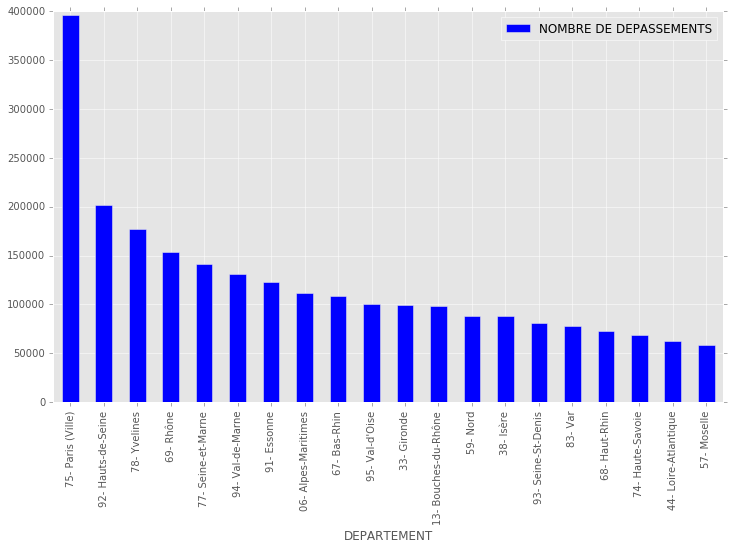

In [107]:
frame3.head(20).plot(kind='bar', figsize=(12,7))

<p>
Il manque une donnée importante celle de Paris concernant la densité de population.<br\>
Ce qui fausse grandement nos résultats finaux.
</p>